# River and Watersheds Visualization Using Python

In [ ]:
# connect working directory to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install relevant libraries
!pip install --quiet fiona shapely pyproj rtree
!pip install --quiet geopandas
!pip install --quiet ipython-autotime
!pip install --quiet matplotlib-scalebar

In [ ]:
# access data from working directory
african_rivers = '/content/drive/MyDrive/Rivers/afrivs.shp'
african_lakes = '/content/drive/MyDrive/Rivers/afrlakes.shp'
world = '/content/drive/MyDrive/Rivers/Countries.shp'
r_basins = '/content/drive/MyDrive/Rivers/hd_basins_afr.shp'
globe = '/content/drive/MyDrive/Rivers/globe.png'
glob = '/content/drive/MyDrive/Rivers/global.jpg'

In [ ]:
# import libraries to be used for anaysis
import folium
from folium import *
from folium.plugins import *
import pandas as pd
import geopandas as gpd
import numpy as np
import geopy
from geopy.geocoders import *
%matplotlib inline
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap as lsc
from matplotlib.colors import ListedColormap as lcm
from matplotlib.patches import Rectangle
import matplotlib.patheffects as PathEffects
from matplotlib_scalebar.scalebar import ScaleBar
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.86 ms (started: 2022-12-31 03:02:28 +00:00)


In [ ]:
# access shapefiles from working directory, using geopandas
# rivers' shapefile and lakes' shapefile
a_rivers = gpd.read_file(african_rivers)
a_lakes = gpd.read_file(african_lakes)

time: 42.9 s (started: 2022-12-31 01:56:06 +00:00)


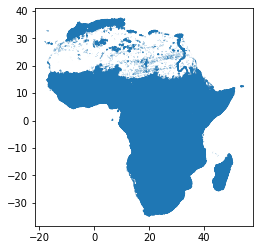

time: 19.1 s (started: 2022-12-31 01:57:05 +00:00)


In [ ]:
# inspect the rivers' data
a_rivers.plot()

In [ ]:
# a_rivers.info()
a_rivers.head()

,cat,AREA,UP_CELLS,DISCHARGE,WIDTH,WIDTH5,WIDTH95,DEPTH,DEPTH5,DEPTH95,ARCID,geometry
0,1,24.56,142,0.55,5.32,1.94,14.74,0.21,0.10,0.49,1,"LINESTRING (9.80417 37.31250, 9.81042 37.31875..."
1,2,34.98,199,0.79,6.38,2.32,17.81,0.25,0.11,0.57,2,"LINESTRING (9.75833 37.27083, 9.76458 37.26458..."
2,3,97.00,566,2.25,10.80,3.84,30.78,0.37,0.16,0.87,4,"LINESTRING (9.39792 37.21458, 9.40625 37.22292..."
3,4,74.98,111,1.72,9.45,3.38,26.81,0.33,0.15,0.78,5,"LINESTRING (9.41250 37.21667, 9.40625 37.21042..."
4,5,408.69,106,9.91,22.66,7.82,66.56,0.66,0.29,1.58,6,"LINESTRING (9.50208 37.20833, 9.50208 37.20208..."


time: 25.9 ms (started: 2022-12-31 01:57:39 +00:00)


In [ ]:

# get the shapefile for plotting the world's continents
world_countries = gpd.read_file(world)
# world_countries.head()


time: 5.27 s (started: 2022-12-31 01:57:51 +00:00)


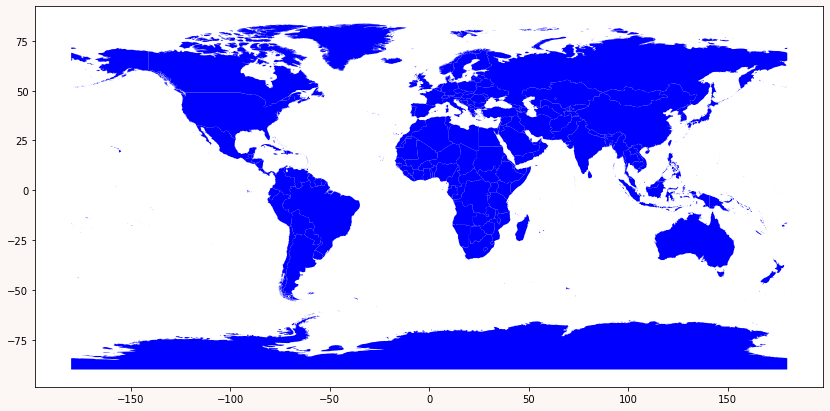

time: 915 ms (started: 2022-12-31 01:58:08 +00:00)


In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(15, 7)
world_countries.plot(ax = ax, color='blue')
plt.show()

In [ ]:
# Binary predicate checks
# a_lakes.sindex.valid_query_predicates
a_rivers.sindex.valid_query_predicates
# africa_lakes.sindex.valid_query_predicates
# africa.sindex.valid_query_predicates

{None,
 'contains',
 'contains_properly',
 'covered_by',
 'covers',
 'crosses',
 'intersects',
 'overlaps',
 'touches',
 'within'}

time: 3.45 ms (started: 2022-12-31 01:59:01 +00:00)


In [ ]:
# Extract Africa data from world_countries dataset by filtering out the continent column
africa = world_countries.loc[world_countries["CONTINENT"] == "Africa"]

# Perform a spatial join between a_lakes and africa using the geopandas sjoin function
# The predicate parameter is set to 'intersects', which means that it only keeps the lakes that
# intersect with the Africa boundary data
africa_lakes = gpd.sjoin(a_lakes, africa, predicate = 'intersects')

# Remove rivers from the a_lakes dataset that are within watersheds in the data
africa_lakes = a_lakes.loc[a_lakes.index.isin(africa_lakes.index.tolist())]

# Perform a spatial join between a_rivers and africa_lakes using the geopandas sjoin function
# The predicate parameter is set to 'within', which means that it only keeps the rivers that are located within a lake
omitted_rivers = gpd.sjoin(a_rivers, africa_lakes, predicate = 'within')

# Remove the rivers that are within watersheds in the data by filtering out the rivers that are located within a lake
a_rivers = a_rivers.loc[~a_rivers.index.isin(omitted_rivers.index.tolist())]


time: 639 ms (started: 2022-12-31 01:59:11 +00:00)


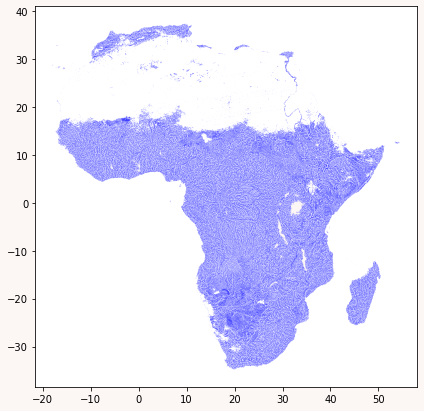

time: 19.4 s (started: 2022-12-31 01:59:26 +00:00)


In [ ]:
# display the data
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(15, 7)
a_rivers.plot(ax = ax, color='blue', lw = 0.1)
africa_lakes.plot(ax = ax, color = '#FCF6F5FF', alpha = 1)
# plt.show()

In [ ]:
# access the basins data
basins = gpd.read_file(r_basins)
# basins.head()

time: 4.76 s (started: 2022-12-31 01:59:59 +00:00)


## Font Families

In [ ]:
!unzip "/content/drive/MyDrive/fonts/Metropolis.zip"
!unzip "/content/drive/MyDrive/fonts/megren_font.zip"
!unzip "/content/drive/MyDrive/fonts/trajan_pro.zip"
!unzip "/content/drive/MyDrive/fonts/cooper_hewitt.zip"
!unzip "/content/drive/MyDrive/fonts/candara.zip"
!unzip "/content/drive/MyDrive/fonts/poppins.zip"
!unzip "/content/drive/MyDrive/fonts/Soundmind.zip"
!unzip "/content/drive/MyDrive/fonts/pragmatica.zip"
!unzip "/content/drive/MyDrive/fonts/autumn_flower.zip"
!unzip "/content/drive/MyDrive/fonts/Free_Sans.zip"
!unzip "/content/drive/MyDrive/fonts/Nimbus_sans.zip"
!unzip "/content/drive/MyDrive/fonts/Brandon_Grotesque_Light.zip"
!unzip "/content/drive/MyDrive/fonts/Brandon_Grotesque_Thin.zip"

In [ ]:
# move fonts to fonts' directory
!mv Candara*.ttf /usr/share/fonts/truetype/
!mv Poppins-*.otf /usr/share/fonts/truetype/
!mv Soundmind.otf /usr/share/fonts/truetype/
!mv TrajanPro-Regular.ttf /usr/share/fonts/truetype/
!mv MegrendemoRegular-OVxz6.otf /usr/share/fonts/truetype/
!mv Metropolis-*.otf /usr/share/fonts/truetype/
!mv Pragmatica-ExtraLight.ttf /usr/share/fonts/truetype/
!mv Autumn_Flower.otf /usr/share/fonts/truetype/
!mv FreeSans*.ttf /usr/share/fonts/truetype/
!mv NimbusSansNovusT-UltraLight.ttf /usr/share/fonts/truetype/
!mv mplus-2p-thin.ttf /usr/share/fonts/truetype/
!mv Coves_Light.otf  /usr/share/fonts/truetype/
!fc-cache -f -v

In [ ]:
# This code snippet is used to define and set properties for a number of different fonts 
# that will be used later in the code. It uses a library called 'matplotlib.font_manager' (fm)
# to set the font properties. These font properties are then used to customize the visual appearance of text in the code.

# The following fonts are defined and set: Megren Font, Sound mind, Metropolis - Thin, Autumn 
# flower, Grotesque_Light, Grotesque_Thin, Pragmatica-ExtraLight, NimbusSansNovusT-UltraLight, 
# Autho - Metropolis, Trajan pro, Cooper hewitt, Poppins thin, Poppins light italic, and Candara.

# Use fonts

# Megren Font
megren =  "/usr/share/fonts/truetype/MegrendemoRegular-OVxz6.otf"
mfont_prop = fm.FontProperties(fname = megren, size = 10)

# sound mind
soundmind = "/usr/share/fonts/truetype/Soundmind.otf"
soundmind_prop = fm.FontProperties(fname = soundmind, size = 20)

#  Metropolis - Thin
metro_thin = "/usr/share/fonts/truetype/Metropolis-Thin.otf"
metrofont_prop = fm.FontProperties(fname = metro_thin, size = 30)

# autumn flower 
autumn_flower = "/usr/share/fonts/truetype/Autumn_Flower.otf"
autumn_flower_prop = fm.FontProperties(fname = autumn_flower, size = 25)

# Grotesque_Light
grotesque_light = "/usr/share/fonts/truetype/Coves_Light.otf"
grotesque_light_prop = fm.FontProperties(fname = grotesque_light, size = 15)

# Grotesque_Thin
grotesque_thin = "/usr/share/fonts/truetype/mplus-2p-thin.ttf"
grotesque_thin_prop = fm.FontProperties(fname = grotesque_thin, size = 20)

# Pragmatica-ExtraLight
prag = "/usr/share/fonts/truetype/Pragmatica-ExtraLight.ttf"
prag_prop = fm.FontProperties(fname = prag, size = 30)

# NimbusSansNovusT-UltraLight
nimbus = "/usr/share/fonts/truetype/NimbusSansNovusT-UltraLight.ttf"
nimbus_prop = fm.FontProperties(fname = nimbus, size = 20)


# autho - metropolis
metro_thin = "/usr/share/fonts/truetype/Metropolis-Thin.otf"
metrofontprop_i = fm.FontProperties(fname = metro_thin, size = 15)

# trajan pro
trajan_pro_regular = "/usr/share/fonts/truetype/TrajanPro-Regular.ttf"
trajan_pro_prop = fm.FontProperties(fname = trajan_pro_regular, size = 25)

# cooper hewitt
cooper_thin = "/usr/share/fonts/truetype/CooperHewitt-Thin.otf"
cooper_thin_prop = fm.FontProperties(fname = cooper_thin, size = 30)

# poppins thin
pop_thin =  "/usr/share/fonts/truetype/Poppins-ThinItalic.otf"
pop_thin_prop = fm.FontProperties(fname = pop_thin, size = 20)

# poppins light italic
pop_black = "/usr/share/fonts/truetype/Poppins-LightItalic.otf" 
pop_black_prop = fm.FontProperties(fname = pop_black, size = 20)

# candara
candara = "/usr/share/fonts/truetype/Candara.ttf"
candara_prop = fm.FontProperties(fname = candara, size = 15)

# candara - modified
candara = "/usr/share/fonts/truetype/Candara.ttf"
candara_mod_prop = fm.FontProperties(fname = candara, size = 10)

time: 4.74 ms (started: 2022-12-31 02:45:46 +00:00)


In [ ]:
# colour pallette for displaying all river basins in the study area
pallette = ['#F38400', '#E68FAC', '#604E97', '#B3446C', '#C2B280',
            '#F6A600', '#993366', '#E25822', '#8DB600', '#DCD300', 
            '#660033', '#0067A5', '#E68FAC', '#BE0032', '#848482', 
            '#222222', '#C2B280', '#006600', '#0000FF','#875692', 
            '#F3C300', '#A1CAF1', '#F99379', '#222222', '#008856'
            ]

colors_df = pd.DataFrame({'basin': basins.NAME.unique().tolist(), 'colors': pallette})

time: 4.15 ms (started: 2022-12-31 02:08:15 +00:00)


## Customizing Legend for Visualizing River Basins

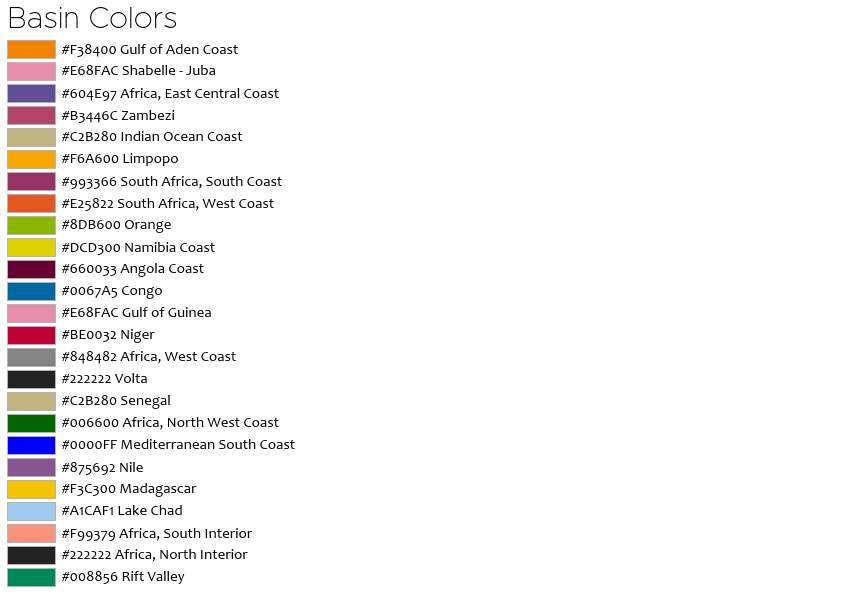

time: 185 ms (started: 2022-12-31 02:13:42 +00:00)


In [ ]:
# setting the width and height of each cell and the size of the color swatch, as well as the margins
cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

# setting the number of rows and columns
n = len(pallette)
ncols = 1
nrows = len(pallette)

# setting the width and height of the figure, as well as the DPI
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 72

# creating the figure and axes with specified size and DPI
fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)

# adjusting the margins of the subplots
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)

# making the x and y axes invisible and turning off the axis
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()

# setting the title of the plot
ax.set_title("Basin Colors", fontsize=24, loc="left", pad = 10, fontproperties = metrofont_prop)

# iterating through the values of the pallette variable and the unique values of the basins.NAME column
for i, (name, basin) in enumerate(zip(pallette, basins.NAME.unique().tolist())):
    # calculating the row and column values
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    # calculating the x position for the color swatch
    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    # adding text to the plot with specific font properties and positions
    ax.text(text_pos_x, y, (name + " " + basin), fontsize = 14,
            horizontalalignment = 'left',
            verticalalignment = 'center',
            fontproperties = candara_prop
            )

    # adding a rectangle patch to the plot, representing the color swatch, with specific width, height, color, and edge color
    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor = name, edgecolor = '0.7')
    )
    
# displaying the created plot
plt.show()

/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


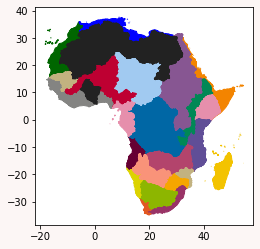

time: 631 ms (started: 2022-12-31 02:14:06 +00:00)


In [ ]:
basins = pd.merge(basins, colors_df, left_on = 'NAME', right_on = 'basin', how = 'left')
fig, ax = plt.subplots(facecolor = '#FCF6F5FF')
basins.plot(ax = ax, column = 'NAME', edgecolor = 'face', color = basins['colors'], legend = True)
plt.show()

In [ ]:
basins.head()

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER_,SORT,NAME,geometry,basin,colors
0,1030000010,0,1030000010,1030000010,0.0,0.0,236343.2,236343.2,111,0,1,0,1,Gulf of Aden Coast,"MULTIPOLYGON (((44.03333 1.10833, 44.04231 1.1...",Gulf of Aden Coast,#F38400
1,1030008100,0,1030008100,1030008100,0.0,0.0,797881.4,797881.4,114,0,0,1,3,Shabelle - Juba,"POLYGON ((36.74167 4.06667, 36.74131 4.06909, ...",Shabelle - Juba,#E68FAC
2,1030008110,0,1030008110,1030008110,0.0,0.0,1040194.7,1040194.7,117,0,1,0,4,"Africa, East Central Coast","MULTIPOLYGON (((38.88788 -17.23280, 38.88611 -...","Africa, East Central Coast",#604E97
3,1030011660,0,1030011660,1030011660,0.0,0.0,1378103.3,1378121.1,122,0,0,1,6,Zambezi,"POLYGON ((35.26250 -18.23333, 35.26215 -18.244...",Zambezi,#B3446C
4,1030011670,0,1030011670,1030011670,0.0,0.0,245186.1,245186.1,123,0,1,0,7,Indian Ocean Coast,"MULTIPOLYGON (((35.44861 -23.82500, 35.44252 -...",Indian Ocean Coast,#C2B280


time: 530 ms (started: 2022-12-31 02:14:36 +00:00)


In [ ]:
# Drop unwanted columns
cols_to_drop = ["basin_x",	"colors_x",	"basin_y",	"colors_y",	"basin_x",	"colors_x",	"basin_y", "colors_y"]
basins.drop(columns = cols_to_drop, inplace = True)

In [ ]:
# Perform a spatial join between a_rivers and basins dataset
# This will return only the rivers that intersect with any basin in the basins dataset
afr_basins = gpd.sjoin(a_rivers, basins, predicate = 'intersects')

time: 8min 11s (started: 2022-12-31 02:14:53 +00:00)


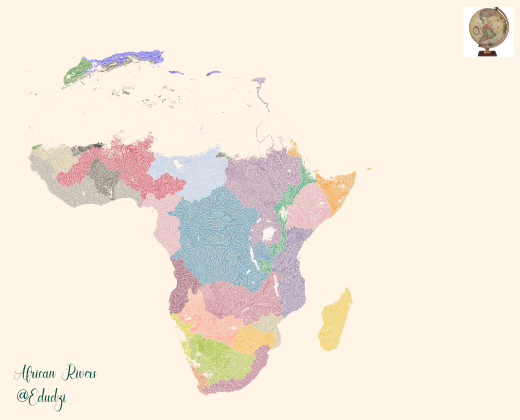

time: 20.9 s (started: 2022-12-31 02:30:01 +00:00)


In [ ]:
# Create a figure and an axis with a specified background color
fig, ax = plt.subplots(facecolor = '#FEF5E7')

# Set the size of the figure
fig.set_size_inches(10, 7)

# Plot the afr_basins dataset on the axis, with specified edge color, color and line width
afr_basins.plot(ax = ax, edgecolor = 'face', color = afr_basins['colors'], lw = 0.1)

# Plot the africa_lakes dataset on the axis, with specified color
africa_lakes.plot(ax = ax, color = '#FCF6F5FF')

# Add an image as a logo on the figure
logo = plt.imread(glob)
newax = fig.add_axes([0.85, 0.83, 0.1, 0.1], anchor = 'NE', zorder = -1) 
newax.imshow(logo)

# turn the axis off
newax.axis('off')

# Add a caption to the axis
caption = ax.text(0.02, 0.03, "African Rivers \n@Edudzi",
                  color = '#0B5345',
                  transform = ax.transAxes,
                  fontproperties = soundmind_prop)

# save output
out_img = '/content/drive/MyDrive/Rivers/raw1.png'
ax.axis('off')
# plt.savefig(out_img, dpi = 500, facecolor = '#F9EBEA', orientation = 'portrait', papertype = 'A4', bbox_inches = 'tight')
# display map
plt.show()

In [ ]:

# Function to scale the values of the given column in the geo dataframe by a given range
def stream_order(df: gpd.GeoDataFrame, col: str, min_val: float = 0.005, max_val: float = 0.6):
  
  # calculate the range of the column
  leftSpan = np.amax(df[col]) - np.amin(df[col])
  
  # calculate the desired range
  rightSpan = 0.6 - 0.005
  
  # Scale the values of the column
  val_scaled = (df[col] - np.amin(df[col])) /  leftSpan
  
  # Add a new column to store the scaled values
  df[f'LW_{col}'] = 0.005 + (val_scaled * rightSpan)
  
  # Return the modified dataframe
  return df

# This function takes a gpd.GeoDataFrame, column name (col) as input, and two optional arguments min_val 
# and max_val, the function scales the values of the given column in the geo dataframe by a given range. 
# It does this by first calculating the range of the values in the input column, then it calculates the 
# desired range. Then it scales the values of the column and finally, it adds a new column to the dataframe 
# to store the scaled values, and returns the modified dataframe.

time: 1.06 ms (started: 2022-12-31 02:30:36 +00:00)


In [ ]:
afr_basins.info()

In [ ]:
# The following lines of code are using the stream_order function on 
# the afr_basins dataframe to scale the values of the 'DISCHARGE', 
# 'DEPTH', and 'WIDTH' columns by the given range. The stream_order 
# function takes gpd.GeoDataFrame, column name (col) as input, 
# and two optional arguments min_val and max_val. It scales the values 
# of the column and adds a new column to the dataframe to store the scaled values.

# Scale the values of the 'DISCHARGE' column in the afr_basins dataframe by the given range
afr_basins = stream_order(afr_basins, 'DISCHARGE', min_val = 0.005, max_val = 0.6)

# Scale the values of the 'DEPTH' column in the afr_basins dataframe by the given range
afr_basins = stream_order(afr_basins, 'DEPTH', min_val = 0.005, max_val = 0.6)

# Scale the values of the 'WIDTH' column in the afr_basins dataframe by the given range
afr_basins = stream_order(afr_basins, 'WIDTH', min_val = 0.005, max_val = 0.6)


time: 35.4 ms (started: 2022-12-31 02:30:49 +00:00)


## Display Three Maps, Based on Discharge, Depth, and Width of the Rivers

<p>This code is creating a figure and three subplots, one for each DISCHARGE, DEPTH and WIDTH. The subplots are plotted on the figure using the afr_basins and africa_lakes datasets. The background color of the figure is set using the facecolor parameter of the plt.figure() function. The size of the figure is set using the set_size_inches() function.</p>

<p>The first subplot, ax_i is plotting the afr_basins dataset with the color 'blue' and line width set to the 'LW_DISCHARGE' column, which is the scaled version of the 'DISCHARGE' column. The africa_lakes dataset is also plotted on this subplot with the color '#FCF6F5FF'. The title of the subplot is set to "Discharge" and the font properties are set to candara_prop. The axis is turned off using the axis('off') function.</p>

<p>The second subplot, ax_ii is plotting the afr_basins dataset with the color 'blue' and line width set to the 'LW_DEPTH' column, which is the scaled version of the 'DEPTH' column. The africa_lakes dataset is also plotted on this subplot with the color '#FCF6F5FF'. The title of the subplot is set to "Depth" and the font properties are set to candara_prop. The axis is turned off using the axis('off') function.</p>

<p>The third subplot, ax_iii is plotting the afr_basins dataset with the color 'blue' and line width set to the 'LW_WIDTH' column, which is the scaled version of the 'WIDTH' column. The africa_lakes dataset is also plotted on this subplot with the color '#FCF6F5FF'. The title of the subplot is set to "Width" and the font properties are set to candara_prop. The axis is turned off using the axis('off') function.</p>

<p>Finally, the plt.show() function is called to display the plotted figure.<p>

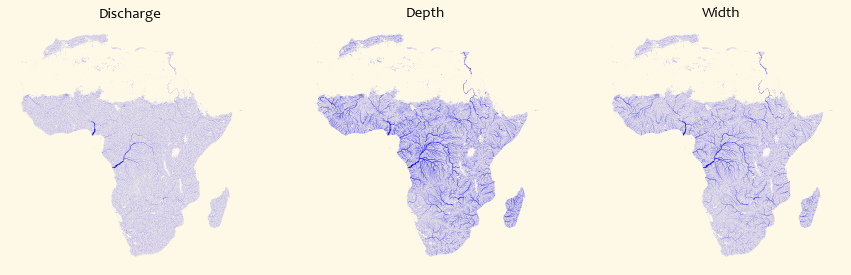

time: 1min 13s (started: 2022-12-31 02:32:06 +00:00)


In [ ]:
# Create a figure and set the background color
fig = plt.figure(facecolor = '#FEF9E7')

# Set the size of the figure
fig.set_size_inches(15, 7)

# Create the first subplot, plot the afr_basins dataset with line width set to the 'LW_DISCHARGE' column
ax_i = plt.subplot(1, 3, 1)
afr_basins.plot(ax = ax_i, color = 'blue', lw = afr_basins['LW_DISCHARGE'])
africa_lakes.plot(ax = ax_i, color = '#FCF6F5FF')

# Set the title of the subplot, and set the font properties
ax_i.set_title("Discharge", fontproperties = candara_prop)

# Turn off the axis
ax_i.axis('off')

# Create the second subplot, plot the afr_basins dataset with line width set to the 'LW_DEPTH' column
ax_ii = plt.subplot(1, 3, 2)
afr_basins.plot(ax = ax_ii, color = 'blue', lw = afr_basins['LW_DEPTH'])
africa_lakes.plot(ax = ax_ii, color = '#FCF6F5FF')

# Set the title of the subplot, and set the font properties
ax_ii.set_title("Depth", fontproperties = candara_prop)

# Turn off the axis
ax_ii.axis('off')

# Create the third subplot, plot the afr

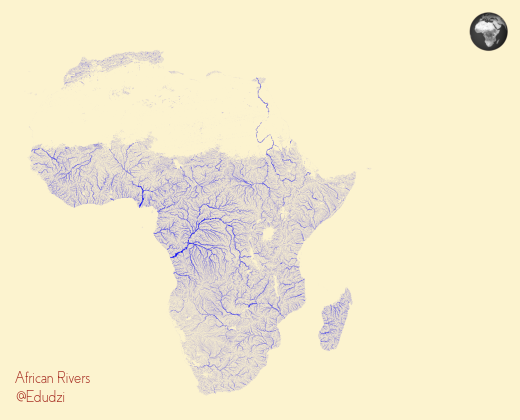

time: 20.6 s (started: 2022-12-31 02:36:35 +00:00)


In [ ]:
# Display a Map, based on Rivers' Depth 
fig, ax = plt.subplots(facecolor = '#FCF3CF')
fig.set_size_inches(10, 7)
afr_basins.plot(ax = ax, edgecolor = 'face', color = 'blue', lw = afr_basins['LW_DEPTH'])
africa_lakes.plot(ax = ax, color = '#FCF3CF')
logo = plt.imread(globe)
newax = fig.add_axes([0.85, 0.83, 0.1, 0.1], anchor = 'NE', zorder = -1) 
newax.imshow(logo)
newax.axis('off')
caption = ax.text(0.02, 0.03, "African Rivers \n@Edudzi",
                  size = 12,
                  color = '#A93226',
                  transform = ax.transAxes,
                  fontproperties = grotesque_light_prop)
out_img = '/content/drive/MyDrive/Rivers/raw2.png'
ax.axis('off')
# plt.savefig(out_img)
plt.show()

In [ ]:
# This code is creating a new column named 'coordinate'
# in the basins dataframe. It extracts the representative
# point of each polygon in the 'geometry' column using
# the representative_point() function. The coordinate
# column is then extracted the x and y coordinates from 
# the 'coordinate' column. This new coordinate column is 
# going to be used later to add labels on the final map.

# Create a new column named 'coordinate' in the basins dataframe
# that extracts the representative point of each polygon in the geometry column
basins['coordinate'] = basins["geometry"].apply(lambda x: x.representative_point().coords[:])

# Extract the x and y coordinates from the coordinate column 
basins['coordinate'] = [coordinate[0] for coordinate in basins['coordinate']]

# basins.head()

time: 12.6 ms (started: 2022-12-31 02:37:11 +00:00)


## Final Map

This code is creating a final map that shows African rivers based on their parent watersheds. It plots the afr_basins dataset with the edgecolor set to 'face', color set to the 'colors' column, and line width set to the 'LW_DEPTH' column multiplied by 6. It also plots the africa_lakes dataset with color set to '#FCF3CF'. It annotates the basins with their names and coordinates, and adds a stroke effect to the labels. It also adds a scalebar to the bottom right corner of the plot, a logo image to the top right corner of the plot, and a caption to the bottom left corner of the plot. The final plot is shown with plt.show()

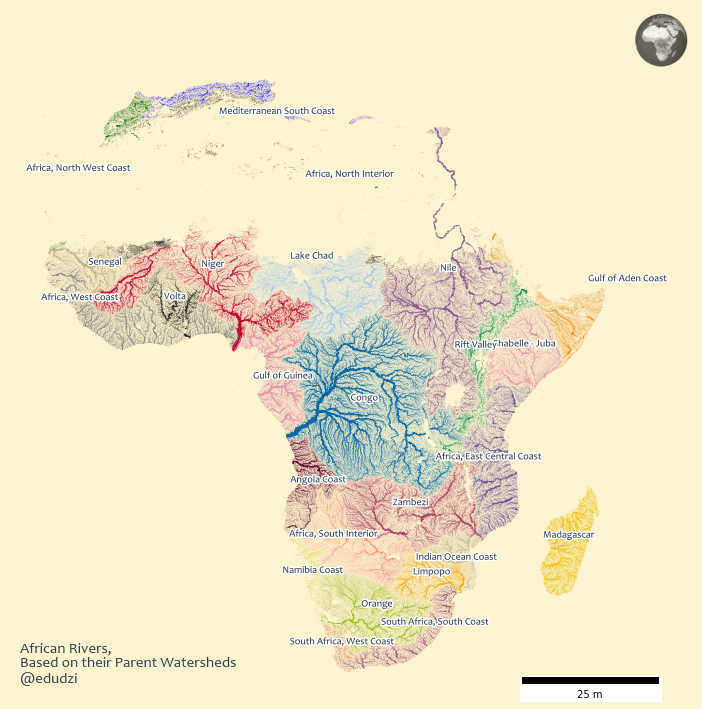

time: 19.6 s (started: 2022-12-31 03:14:25 +00:00)


In [ ]:
# Create a figure and set the background color
fig, ax = plt.subplots(facecolor = '#FCF3CF') 

# Set the size of the figure
fig.set_size_inches(12, 12)

# Plot the afr_basins dataset with edgecolor set to 'face',
# color set to the 'colors' column, and line width set to the
# 'LW_DEPTH' column multiplied by 6
afr_basins.plot(ax = ax, edgecolor = 'face', color = afr_basins['colors'], lw = afr_basins['LW_DEPTH'] * 6)
 # basins.plot(ax = ax, edgecolor = 'face', color = 'w', column = 'NAME', legend = True)
# Plot the africa_lakes dataset with color set to '#FCF3CF'
africa_lakes.plot(ax = ax, color = '#FCF3CF')

# Annotate the basins with their names and coordinates
for idx, row in basins.iterrows():
  label = plt.annotate(s = row["NAME"],
               xy = row['coordinate'],
               horizontalalignment = "center",
               verticalalignment = 'bottom',
               wrap = True,
               color = '#212F3D',
               fontproperties = candara_mod_prop,
               weight = 'bold') 

  # Add a stroke effect to the labels
  label.set_path_effects([PathEffects.withStroke(linewidth = 3, foreground = "#FDFEFE")])

# Add a scalebar to the bottom right corner of the plot
scalebar = ScaleBar(1.5, "m", length_fraction = 0.25, color = "black", location = 'lower right')
ax.add_artist(scalebar)

# Add a logo image to the top right corner of the plot
logo = plt.imread(globe)
# newax = fig.add_axes([0.8, 1, 0.08, 0.08], anchor = 'NE', zorder = -1) 
newax = fig.add_axes([0.85, 0.83, 0.08, 0.1], anchor = 'NE', zorder = -1) 
newax.imshow(logo, alpha = 0.8)
newax.axis('off')

# Add a caption to the bottom left corner of the plot
caption = ax.text(0.02, 0.03, "African Rivers, \nBased on their Parent Watersheds \n@edudzi",
                  size = 12,
                  color = '#2C3E50',
                  transform = ax.transAxes,
                  fontproperties = candara_prop,
                  weight = 'bold', 
                  style = 'italic')
# save final map
out_img = '/content/drive/MyDrive/Rivers/raw14.png'
ax.axis('off')
# plt.savefig(out_img, dpi = 500, facecolor = '#F9EBEA', orientation = 'portrait', papertype = 'A4', bbox_inches = 'tight')
# display map
plt.show()